In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os


project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from cs_portfolio_project.optimisation.asset_analysis import *
from cs_portfolio_project.optimisation.portfolio import *
from cs_portfolio_project.optimisation.black_litterman import *

%load_ext autoreload
%autoreload 2

In [2]:
from cs_portfolio_project.data_extraction.get_data_cs2 import save_csv_from_list

HTTP error: 400 Client Error: Bad Request for url: https://steamcommunity.com/market/pricehistory/?appid=730&market_hash_name=Sir+Bloody+Miami+Darryl+%7C+The+Professionals
Response: []


TypeError: 'NoneType' object is not subscriptable

In [168]:
assets_monthly = AssetAnalysis(r'../data/processed/D/cases.csv',resample_size='M')

c:\Users\steph\Desktop\cs_portfolio-main\cs_portfolio_project\optimisation\asset_analysis.py:211: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

c:\Users\steph\Desktop\cs_portfolio-main\cs_portfolio_project\optimisation\asset_analysis.py:212: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



weights : [3.63803714e+00 5.03655007e-01 1.58072296e-15 0.00000000e+00
 0.00000000e+00 6.17463206e+00 4.04564246e+00 1.54894034e+00
 1.35960966e+01 3.56570213e+01 3.62685590e+00 7.98294631e-01
 4.98193939e+00 5.90113825e-15 1.25007240e-15 0.00000000e+00
 4.20272470e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.75368868e+00 9.95220521e-01 5.17673450e-16 2.79547011e+00
 0.00000000e+00 2.57982545e-15 1.66368256e-15 0.00000000e+00
 0.00000000e+00 1.52722158e-15 3.61474462e-01 0.00000000e+00
 0.00000000e+00 1.03203067e+01 2.55890771e-15 4.26226979e-16]
portfolio return (ann) : 0.9835577034830154
portfolio vol (ann): 0.38143791348956435


In [154]:
assets_weekly = AssetAnalysis(r'../data/processed/D/cases.csv',resample_size='W')

c:\Users\steph\Desktop\cs_portfolio-main\cs_portfolio_project\optimisation\asset_analysis.py:211: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



weights : [7.54950812e+00 4.83390128e+00 7.02020907e-16 0.00000000e+00
 6.32903018e-16 4.70295239e+00 8.97605868e+00 2.45904962e+00
 8.11022448e+00 2.47798354e+01 1.83930374e+00 3.02592623e-01
 6.77560968e+00 0.00000000e+00 4.57636497e+00 3.75405002e-16
 1.04761035e-15 6.12235414e-16 0.00000000e+00 3.38813179e-16
 6.30192513e-16 2.72744609e-16 2.30392962e-17 3.07006561e+00
 1.07200490e-15 0.00000000e+00 4.59430671e-16 3.33392168e-16
 3.03915421e-16 0.00000000e+00 9.79035033e+00 0.00000000e+00
 1.05709712e-15 3.78148860e+00 0.00000000e+00 8.45269448e+00]
portfolio return (ann) : 0.9214027979654918
portfolio vol (ann): 0.36789248025545895


In [19]:
assets_monthly.players.index.difference(assets_monthly.rets_and_market.index)


Index(['2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31', '2013-01-31',
       '2013-02-28', '2013-03-31', '2013-04-30', '2013-05-31', '2013-06-30',
       '2013-07-31', '2013-08-31', '2013-09-30', '2013-10-31'],
      dtype='object')

In [40]:
merged['player_lagged'] = merged['Change_pct'].shift(1)

In [41]:
merged[['market','player_lagged']].corr()

market  player_lagged
market         1.000000       0.430885
player_lagged  0.430885       1.000000

<Axes: xlabel='market', ylabel='player_lagged'>

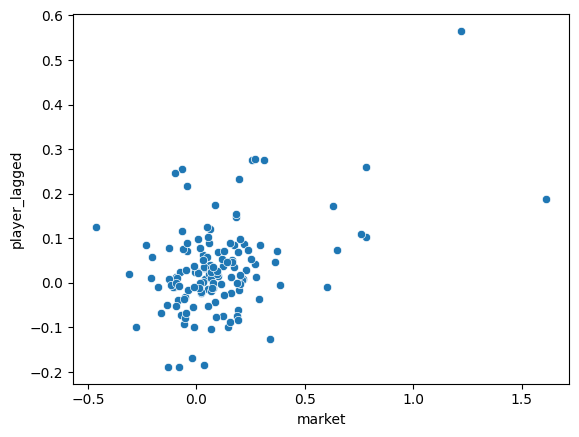

In [42]:
sns.scatterplot(x=merged['market'],y=merged['player_lagged'])

In [7]:
assets = AssetAnalysis(r'../data/processed/D/cases.csv')

c:\Users\steph\Desktop\cs_portfolio-main\cs_portfolio_project\optimisation\asset_analysis.py:208: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  self.returns = self.data.pct_change().dropna(how='all')


weights : [6.52336439e+00 3.08903286e+00 1.02367030e-01 2.95192419e-01
 1.12862083e+00 9.49200991e-01 3.71087069e+00 1.60444134e+01
 4.48100983e+00 5.26248685e+00 5.10409412e+00 1.74822930e+00
 2.73047541e+00 6.10413879e+00 6.17021233e-01 0.00000000e+00
 1.03398131e+00 0.00000000e+00 1.05540196e-01 1.86880095e+00
 1.75117441e+00 1.75891917e+00 2.28254311e+00 3.98499256e+00
 0.00000000e+00 0.00000000e+00 7.13201742e-16 4.87890978e-17
 0.00000000e+00 2.78165620e-16 3.04486973e+00 2.02710998e+00
 1.78605367e-15 5.91402162e+00 4.55843522e+00 1.37790936e+01]
portfolio return (ann) : 1.0459584305413268
portfolio vol (ann): 5.545123587493762


In [14]:
assets.plot_returns_distribution(3000,log_rets=True)

mean=0.0016895075767151349, std=0.038330903203132004
skewness=0.3274947515186731, kurtosis=17.10175734022854


<Axes: ylabel='Count'>

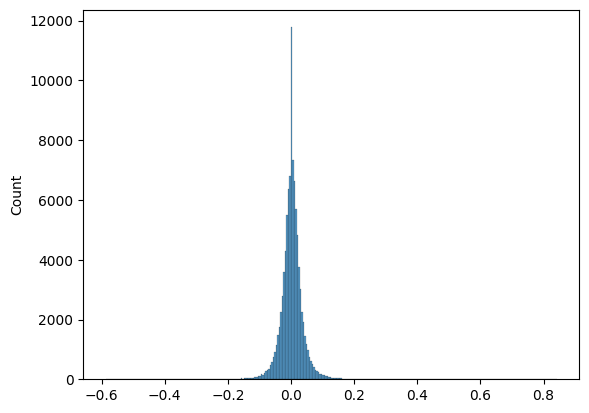

In [5]:
sns.histplot(assets.log_rets_and_market.to_numpy().flatten(),bins=300)

<Axes: ylabel='Count'>

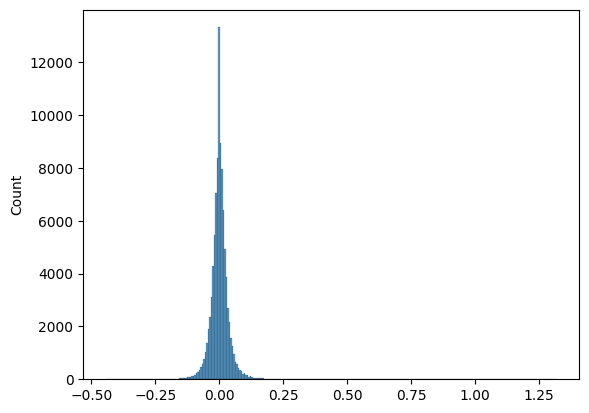

In [6]:
sns.histplot(assets.rets_and_market.to_numpy().flatten(),bins=300)

In [6]:
assets.players.index

DatetimeIndex(['2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30',
               ...
               '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30',
               '2024-10-31', '2024-11-30', '2024-12-31', '2025-01-31',
               '2025-02-28', '2025-03-31'],
              dtype='datetime64[ns]', name='Month', length=151, freq=None)

In [ ]:
asset_rets = assets.returns
n_asset = asset_rets.shape[1]
weights = np.array([n_asset]*n_asset)
# weights = weights/sum(weights)
weights= assets.mwp[0]
mc_sims = 100 # number of simulations
T = 365 #timeframe in days

meanM = np.full(shape=(T, len(weights)), fill_value=asset_rets.mean())
meanM = meanM.T
meanM

In [103]:
initialPortfolio = 100

mean_daily = asset_rets.mean().values  # (n_assets,)
cov_daily = asset_rets.cov().values    # (n_assets x n_assets)

L = np.linalg.cholesky(cov_daily)
portfolio_sims = np.zeros((T, mc_sims))

for m in range(mc_sims):
    Z = np.random.normal(size=(T, n_asset))  # standard normals
    correlated_noise = Z @ L.T                # apply Cholesky to get correlated noise
    daily_returns = mean_daily + correlated_noise  # shape: (T, n_assets)

    portfolio_returns = np.dot(daily_returns, weights)  # (T,)
    portfolio_sims[:, m] = initialPortfolio * np.cumprod(1 + portfolio_returns)

In [88]:
asset_rets = assets.returns
n_asset = asset_rets.shape[1]
# weights = np.array([n_asset]*n_asset)
# weights = weights/sum(weights)
# weights= assets.mwp[0]
mc_sims = 1000 # number of simulations
T = 365 #timeframe in days

meanM = np.full(shape=(T, len(weights)), fill_value=asset_rets.mean())
meanM = meanM.T
meanM
mean_daily = asset_rets.mean().values  # (n_assets,)
cov_daily = asset_rets.cov().values
portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)

initialPortfolio = 100

for m in range(0, mc_sims):
    # MC loops
    Z = np.random.normal(size=(T, len(weights)))
    L = np.linalg.cholesky(cov_daily)
    dailyReturns = meanM + np.inner(L, Z)
    print(dailyReturns)
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio

[[-0.03052662 -0.01283948 -0.01690881 ... -0.04512101  0.02349622
   0.00848158]
 [ 0.04619185 -0.03417864  0.04946793 ... -0.01409036  0.0264799
   0.01578856]
 [ 0.07277974  0.03035738 -0.02256394 ... -0.0312228   0.01430363
  -0.05484649]
 ...
 [ 0.04021402 -0.06239554 -0.02508355 ...  0.00837912  0.007894
  -0.02561796]
 [-0.04979199 -0.02150174 -0.01027673 ... -0.03451361  0.00950025
   0.05833747]
 [ 0.01456614 -0.01263726  0.00573086 ... -0.0065893   0.01606749
   0.01952873]]
[[ 1.86727653e-02  7.94095608e-04 -6.48026702e-03 ... -8.46961492e-02
   2.15161547e-02  9.41531256e-03]
 [-2.65701948e-02  7.39608199e-02  2.26963090e-02 ... -6.84404961e-02
   2.33256789e-02  2.61382314e-02]
 [ 7.70905076e-02  8.93673708e-02  1.55351966e-02 ...  1.86162109e-02
   5.83283693e-02  2.40578734e-02]
 ...
 [ 3.56039427e-02  1.82734300e-02 -1.34927789e-02 ...  1.35064581e-03
   6.49206736e-03  1.13679174e-02]
 [-1.82336381e-02  2.15414888e-03 -4.52229549e-02 ... -3.20666744e-02
  -1.10829524e-0

In [21]:
caps = assets.data[['fracture','shadow']].iloc[-1]*[10,10]
weights_caps = caps/caps.sum()
weights_caps

fracture    0.15269
shadow      0.84731
Name: 2025-06-02 00:00:00, dtype: float64

In [23]:
# weights =np.array([0]*len(assets.data.columns))
weights= pd.Series(data=np.array([0]*len(assets.data.columns)),index=assets.data.columns)


In [29]:
pd.Series(0.0, index=assets.data.columns)

csgo_weapon                  0.0
operation_bravo              0.0
csgo_weapon_2                0.0
winter_offensive_weapon      0.0
csgo_weapon_3                0.0
operation_phoenix_weapon     0.0
huntsman_weapon              0.0
operation_breakout_weapon    0.0
esports_2014_summer          0.0
esports_2013                 0.0
esports_2013_winter          0.0
operation_vanguard_weapon    0.0
chroma                       0.0
chroma_2                     0.0
falchion                     0.0
shadow                       0.0
revolver                     0.0
operation_wildfire           0.0
chroma_3                     0.0
gamma                        0.0
gamma_2                      0.0
glove                        0.0
spectrum                     0.0
operation_hydra              0.0
spectrum_2                   0.0
clutch                       0.0
horizon                      0.0
danger_zone                  0.0
prisma                       0.0
cs20                         0.0
shattered_

In [55]:
assets.data.iloc[-2]

csgo_weapon                  109.354391
operation_bravo               54.084739
csgo_weapon_2                 12.765167
winter_offensive_weapon        8.529542
csgo_weapon_3                  9.006500
operation_phoenix_weapon       5.976167
huntsman_weapon               12.278375
operation_breakout_weapon     10.762750
esports_2014_summer           12.150227
esports_2013                  77.290400
esports_2013_winter           12.747591
operation_vanguard_weapon      4.727917
chroma                         5.914458
chroma_2                       4.851208
falchion                       2.179417
shadow                         1.968875
revolver                       3.639583
operation_wildfire             4.314708
chroma_3                       4.681167
gamma                          5.281125
gamma_2                        5.150083
glove                         15.547125
spectrum                       5.738542
operation_hydra               27.943375
spectrum_2                     4.171542


In [27]:
weights[weights_caps.index] = weights_caps

C:\Users\steph\AppData\Local\Temp\ipykernel_31028\2338016621.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.15268959 0.84731041]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[weights_caps.index] = weights_caps


In [15]:
def generate_weights(skins:list,quantity:list,assets:AssetAnalysis):
    
    if len(skins) != len(quantity):
        raise ValueError("Length of 'skins' and 'quantity' are not equal")

    latest_prices  = assets.data[skins].ffill().iloc[-1]
    capital = latest_prices * quantity
    portofolio_value = capital.sum()
    weights_caps = capital/capital.sum()
    weights= pd.Series(0.0, index=assets.data.columns)
    weights[weights_caps.index] = weights_caps

    return weights,portofolio_value

In [16]:
weights,initial_portfolio = generate_weights(['fracture','shadow','huntsman_weapon','falchion'],[200,100,10,40],assets)
weights

csgo_weapon                  0.000000
operation_bravo              0.000000
csgo_weapon_2                0.000000
winter_offensive_weapon      0.000000
csgo_weapon_3                0.000000
operation_phoenix_weapon     0.000000
huntsman_weapon              0.256343
operation_breakout_weapon    0.000000
esports_2014_summer          0.000000
esports_2013                 0.000000
esports_2013_winter          0.000000
operation_vanguard_weapon    0.000000
chroma                       0.000000
chroma_2                     0.000000
falchion                     0.185510
shadow                       0.410279
revolver                     0.000000
operation_wildfire           0.000000
chroma_3                     0.000000
gamma                        0.000000
gamma_2                      0.000000
glove                        0.000000
spectrum                     0.000000
operation_hydra              0.000000
spectrum_2                   0.000000
clutch                       0.000000
horizon     

In [70]:
import numpy as np

# Log returns instead of simple returns
log_returns = np.log(1 + assets.returns.dropna())
mean_daily = log_returns.mean().values
cov_daily = log_returns.cov().values

n_assets = log_returns.shape[1]
# weights = assets.mwp[0]  # assuming this is a valid weight vector

mc_sims = 2000  # number of simulations
T = 365  # timeframe in days
# initial_portfolio = 100

# Preallocate simulation matrix
portfolio_sims = np.zeros((T, mc_sims))

# Cholesky decomposition for correlated random draws
L = np.linalg.cholesky(cov_daily)

for m in range(mc_sims):
    # Generate correlated log returns
    Z = np.random.normal(size=(T, n_assets))
    correlated_log_returns = Z @ L.T + mean_daily  # shape: (T, n_assets)

    # Compute cumulative portfolio log returns
    portfolio_log_returns = correlated_log_returns @ weights
    portfolio_prices = initial_portfolio * np.exp(np.cumsum(portfolio_log_returns))

    portfolio_sims[:, m] = portfolio_prices


In [72]:
def find_portfolio_weights_and_value(skins:list,quantity:list,asset_prices:pd.DataFrame):
    
    if len(skins) != len(quantity):
        raise ValueError("Length of 'skins' and 'quantity' are not equal")

    latest_prices  = asset_prices[skins].ffill().iloc[-1]
    capital = latest_prices * quantity
    portofolio_value = capital.sum()
    weights_caps = capital/capital.sum()
    weights= pd.Series(0.0, index=asset_prices.columns)
    weights[weights_caps.index] = weights_caps

    return weights,portofolio_value

def find_portfolio_weights(skins:list,quantity:list,asset_prices:pd.DataFrame):
    return find_portfolio_weights_and_value(skins,quantity,asset_prices)[0]
def find_portfolio_value(skins:list,quantity:list,asset_prices:pd.DataFrame):
    return find_portfolio_weights_and_value(skins,quantity,asset_prices)[1]


def monte_carlo_simulation(expected_rets,cov_matrix,weights,initial_portfolio_value,number_of_sims=100,sim_timeframe=365,log=True):

    rets = expected_rets.values
    cov = cov_matrix.values

    # n_assets = expected_rets.shape[0]
    n_assets = len(rets)
    portfolio_sims = np.zeros((sim_timeframe, number_of_sims))
    L = np.linalg.cholesky(cov)

    for m in range(number_of_sims):
        Z = np.random.normal(size=(sim_timeframe, n_assets))
        correlated_returns = Z @ L.T + rets  # shape: (T, n_assets)
        portfolio_returns = correlated_returns @ weights
        if log:
            portfolio_prices = initial_portfolio_value * np.exp(np.cumsum(portfolio_returns))
        else: 
            portfolio_prices = initial_portfolio_value * np.cumprod(1 + portfolio_returns)

        portfolio_sims[:, m] = portfolio_prices
    return portfolio_sims

def mcVaR(returns, alpha=5):
    """ Input: pandas series of returns
        Output: percentile on return distribution to a given confidence level alpha
    """

    return np.percentile(returns, alpha)


def mcCVaR(returns, alpha=5):
    """ Input: pandas series of returns
        Output: CVaR or Expected Shortfall to a given confidence level alpha
    """
    belowVaR = returns <= mcVaR(returns, alpha=alpha)
    return returns[belowVaR].mean()



In [83]:
weights = find_portfolio_weights(['fracture','shadow','huntsman_weapon','falchion'],[200,100,10,40],assets.data)

ssim=monte_carlo_simulation(assets.returns.mean(),assets.returns.cov(),weights,100,log=False,number_of_sims=30)


In [128]:
def plot_portfolio_pie(weights: pd.Series):
    """
    Plot a pie chart of portfolio allocation by asset weights.

    Args:
        weights (pd.Series): Portfolio weights, index as asset names.
        title (str): Title of the pie chart.

    Returns:
        None
    """
    nonzero_weights = weights[weights > 0]
    plt.figure(figsize=(8, 8))
    plt.pie(nonzero_weights, labels=nonzero_weights.index, autopct='%1.1f%%', startangle=140)
    plt.title("Portfolio Allocation")
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

In [130]:
w2 = pd.Series(index=assets.returns.columns,data=np.array([1/len(assets.returns.columns)] * len(assets.returns.columns)))

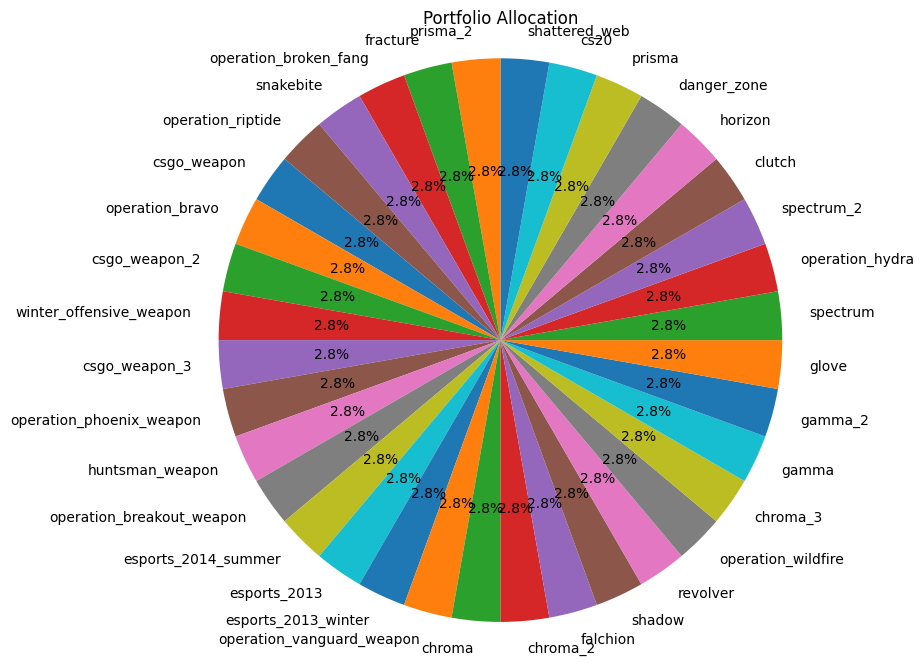

In [131]:
plot_portfolio_pie(w2)

In [82]:
assets.cov_matrix - assets.returns.cov()

csgo_weapon  operation_bravo  csgo_weapon_2  \
csgo_weapon                   0.464994         0.180671       0.171520   
operation_bravo               0.180671         0.482610       0.158796   
csgo_weapon_2                 0.171520         0.158796       0.706623   
winter_offensive_weapon       0.153378         0.155672       0.230607   
csgo_weapon_3                 0.113859         0.100223       0.179250   
operation_phoenix_weapon      0.080796         0.081580       0.104243   
huntsman_weapon               0.093807         0.100076       0.125510   
operation_breakout_weapon     0.038923         0.043615       0.053761   
esports_2014_summer           0.081826         0.077159       0.096294   
esports_2013                  0.097525         0.092247       0.089186   
esports_2013_winter           0.071101         0.082465       0.113511   
operation_vanguard_weapon     0.063940         0.064960       0.079088   
chroma                        0.060456         0.069317       0.075136   
chroma_2                      0.043606         0.051998       0.063511   
falchion                      0.059411         0.059490       0.084191   
shadow                        0.066982         0.059249       0.085353   
revolver                      0.035638         0.071130       0.081487   
operation_wildfire            0.054655         0.062345       0.103259   
chroma_3                      0.036290         0.066493       0.074815   
gamma                         0.047415         0.052922       0.068790   
gamma_2                       0.046839         0.067584       0.071062   
glove                         0.044295         0.063971       0.087109   
spectrum                      0.049629         0.069549       0.069238   
operation_hydra               0.076739         0.080604       0.093426   
spectrum_2                    0.058612         0.064669       0.078415   
clutch                        0.054011         0.068741       0.093001   
horizon                       0.055889         0.074283       0.079845   
danger_zone                   0.048556         0.068857       0.065504   
prisma                        0.033413         0.065926       0.076026   
cs20                          0.047664         0.084933       0.104305   
shattered_web                 0.048089         0.055988       0.047937   
prisma_2                      0.040997         0.054539       0.070415   
fracture                      0.074792         0.107270       0.125057   
operation_broken_fang         0.047397         0.059355       0.063385   
snakebite                     0.028074         0.064197       0.067551   
operation_riptide             0.029155         0.049627       0.054994   

                           winter_offensive_weapon  csgo_weapon_3  \
csgo_weapon                               0.153378       0.113859   
operation_bravo                           0.155672       0.100223   
csgo_weapon_2                             0.230607       0.179250   
winter_offensive_weapon                   0.569285       0.124248   
csgo_weapon_3                             0.124248       0.640632   
operation_phoenix_weapon                  0.077962       0.094263   
huntsman_weapon                           0.132477       0.111985   
operation_breakout_weapon                 0.048575       0.052020   
esports_2014_summer                       0.095335       0.131994   
esports_2013                              0.088606       0.075797   
esports_2013_winter                       0.099391       0.104184   
operation_vanguard_weapon                 0.096574       0.085034   
chroma                                    0.081384       0.068132   
chroma_2                                  0.061579       0.061269   
falchion                                  0.068813       0.088024   
shadow                                    0.091371       0.109626   
revolver                                  0.100858       0.071236   
operation_wildfire                        0.09

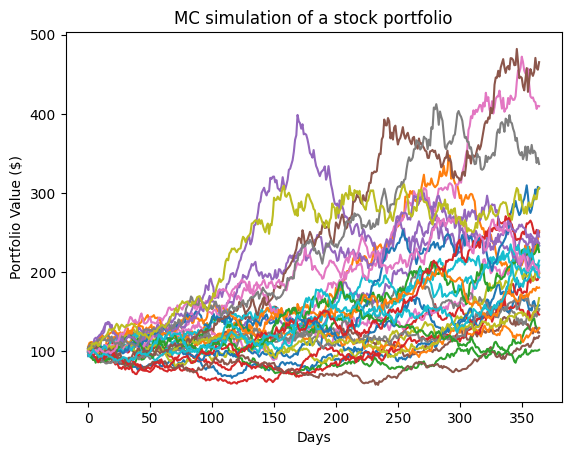

In [84]:
# plt.plot(np.log(portfolio_sims))
plt.plot(ssim)

plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()

In [122]:
def max_drawdown(portfolio_path):
    """
    Calculate maximum drawdown from a single portfolio simulation path.

    Parameters:
        portfolio_path (ndarray): 1D array of portfolio values

    Returns:
        float: max drawdown as a positive decimal (e.g., 0.25 means 25%)
    """
    running_max = np.maximum.accumulate(portfolio_path)
    drawdowns = 1 - portfolio_path / running_max
    return np.max(drawdowns)

def plot_simulation_results(portfolio_sims):
    final_values = portfolio_sims[-1] 

    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    axs[0].plot(portfolio_sims)
    axs[0].set_title('Monte Carlo Simulation Paths')
    axs[0].set_xlabel('Days')
    axs[0].set_ylabel('Portfolio Value ($)')
    axs[1].hist(final_values, bins=50, color='skyblue', edgecolor='black')
    axs[1].set_title('Distribution of Final Portfolio Values')
    axs[1].set_xlabel('Final Portfolio Value ($)')
    axs[1].set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()

def simulate_portfolio_performance(
    rets: pd.DataFrame,
    weight_func: Callable,
    initial_portfolio_value,
    number_of_sims=100,
    sim_timeframe=365,
    log=True,
    expected_returns_func: Optional[Callable] = None,
    covariance_func: Optional[Callable] = None,
    expected_returns_kwargs: dict = {},
    covariance_kwargs: dict = {},
    weight_func_kwargs: dict = {}
):

    rets_copy = rets.copy()
    expected_returns = None
    if expected_returns_func:
        expected_returns = expected_returns_func(
            rets_copy, **expected_returns_kwargs)
    else: expected_returns = rets_copy.mean()

    cov_matrix = None
    if covariance_func:
        cov_matrix = covariance_func(rets_copy, **covariance_kwargs)
    else:
        cov_matrix = rets_copy.cov()

    weights = weight_func(**weight_func_kwargs)

    portfolio_sims = monte_carlo_simulation(expected_returns,cov_matrix,weights,initial_portfolio_value,number_of_sims,sim_timeframe,log)
    portfolio_sims_last=portfolio_sims[-1,:]
    mean_portfolio_value = portfolio_sims_last.mean()
    median_portfolio_value = np.median(portfolio_sims_last)
    std_portfolio = portfolio_sims_last.std()
    conditional_VAR_5_pct=mcCVaR(portfolio_sims_last,5)
    value_at_risk_5_pct= np.percentile(portfolio_sims_last,5)
    prob_loss = np.mean(portfolio_sims_last < initial_portfolio_value)
    
    sim_information={
        'mean_portfolio_value': mean_portfolio_value,
        'median_portfolio_value': median_portfolio_value,
        'standard_deviation': std_portfolio,
        'value_at_risk_5_pct': value_at_risk_5_pct,
        'conditional_VAR_5_pct': conditional_VAR_5_pct,
        "probability_of_loss":prob_loss
    }
    plot_simulation_results(portfolio_sims)
    return portfolio_sims,sim_information

# ['fracture','shadow','huntsman_weapon','falchion'],[200,100,10,40]

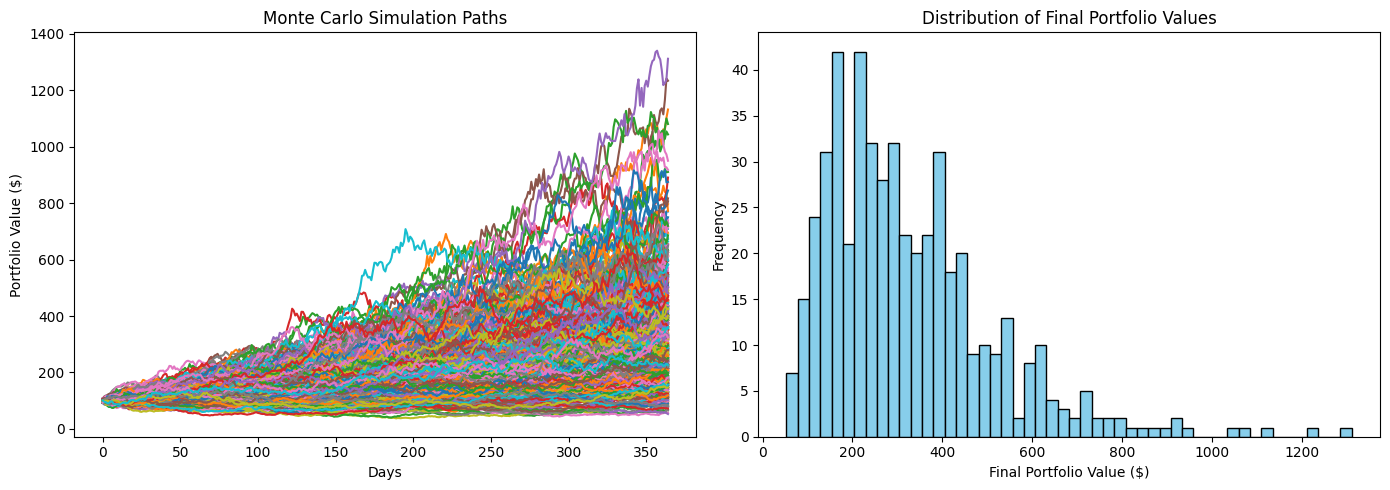

In [123]:
ssim,_= simulate_portfolio_performance(assets.returns, find_portfolio_weights,100,500,365,True,expected_returns_func=get_expected_returns_CAPM,expected_returns_kwargs={"risk_free_rate": 0.0,"market_rets":assets.marketret},weight_func_kwargs={"skins": ['shadow','falchion'],"quantity":[200,100],"asset_prices":assets.data})

TypeError: loop of ufunc does not support argument 0 of type dict which has no callable rint method

<Axes: ylabel='Count'>

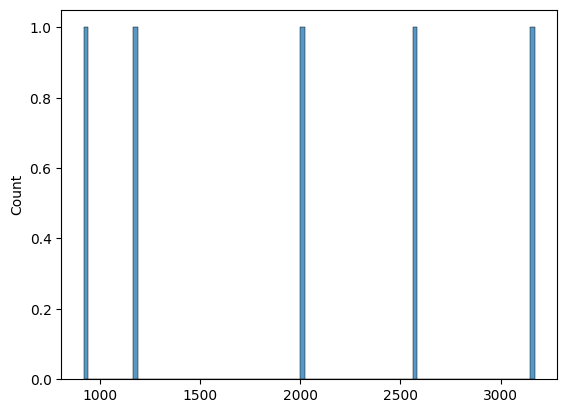

In [113]:
sns.histplot(ssim[-1],bins=100)

In [98]:
max_drawdown(ssim[-1,:])
all_drawdowns = [max_drawdown(portfolio_sims[:, i]) for i in range(portfolio_sims.shape[1])]
np.mean(all_drawdowns)

np.float64(0.24444472999561784)

In [19]:
print(mcCVaR(portfolio_sims[-1,:],5))

416.3064697385164


In [20]:
np.percentile(portfolio_sims[-1,:],5)

np.float64(485.45769206006923)

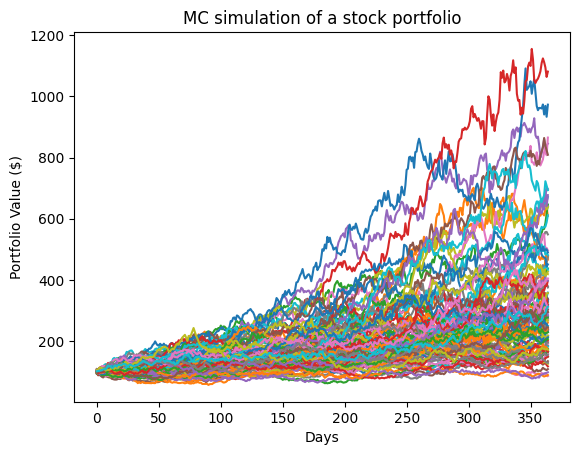

In [92]:
# plt.plot(np.log(portfolio_sims))
plt.plot(ssim)

plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()

<Axes: ylabel='Count'>

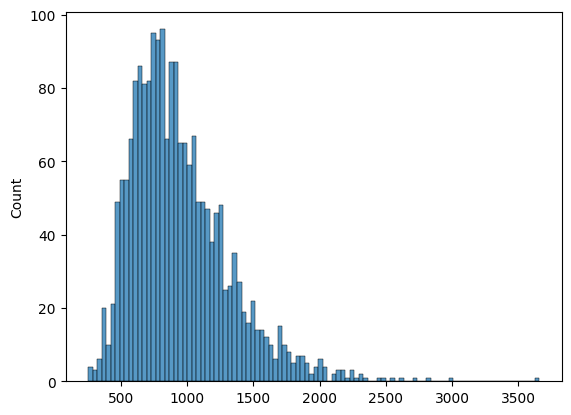

In [22]:
sns.histplot(portfolio_sims[-1],bins=100)

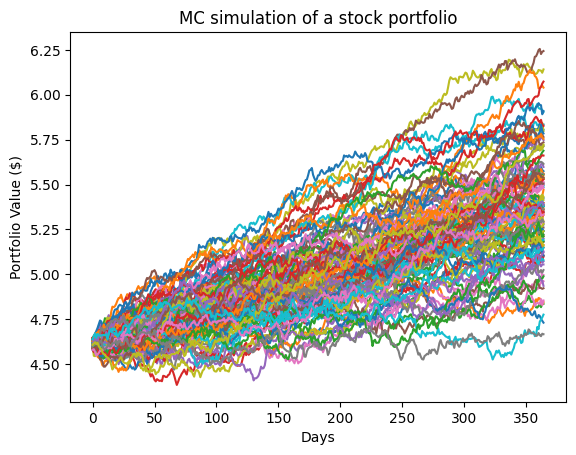

In [96]:

plt.plot(np.log(portfolio_sims))
# plt.plot(portfolio_sims)

plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()

In [60]:
def monte_carlo_simulation(start_value, mean_returns, cov_matrix, n_days=252, n_sims=1000):
    results = np.zeros(n_sims)

    for i in range(n_sims):
        simulated_returns = np.random.multivariate_normal(mean_returns, cov_matrix, size=n_days)
        cumulative_return = (1 + pd.DataFrame(simulated_returns).mean(axis=1)).prod() - 1
        results[i] = start_value * (1 + cumulative_return)

    return results


In [61]:
res = monte_carlo_simulation(100,assets.returns.mean(),assets.cov_matrix,365)

C:\Users\steph\AppData\Local\Temp\ipykernel_36136\88069704.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(res))
C:\Users\steph\AppData\Local\Temp\ipykernel_36136\88069704.py:1: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(res))


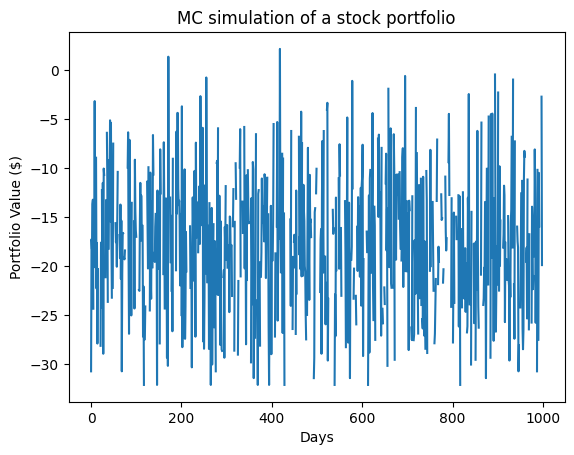

In [62]:
plt.plot(np.log(res))
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()

<Axes: ylabel='Count'>

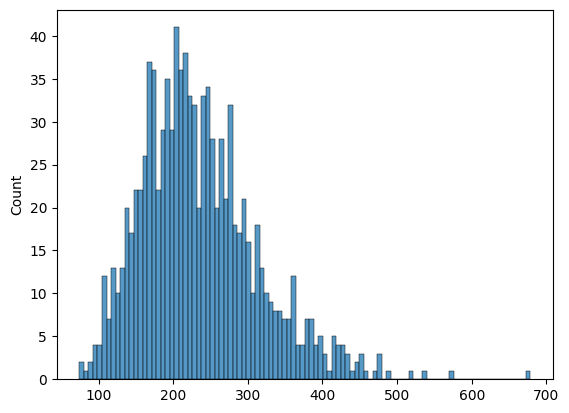

In [50]:
sns.histplot(res,bins=100
             )

In [ ]:
import numpy as np #for numerical array data
import pandas as pd #for tabular data
import matplotlib.pyplot as plt #for plotting purposes
import matplotlib.pylab as pl #for plotting purposes

import csv
from datetime import datetime, timedelta

from matplotlib.collections import LineCollection #for plotting purposes
from sklearn import cluster, covariance, manifold #for graphical analysis
def graphicalAnalysis(dataset, start_date = '2000-01-01', end_date = '2020-05-31', 
                      Sectors_chosen = [],
                      drop_firm = [], 
                      display_SumStat = True, display_IndRet = True, 
                      data_rf = df_rf):
    
    # Check if the inputed date are legit
    if(datetime.strptime(start_date, "%Y-%m-%d") > datetime.strptime(end_date, "%Y-%m-%d")):
        print('ERROR: Revision needed! The entered \"start_date\" should be before \"end_date\".')
        return 0,0
    if (dataset.index[0]- timedelta(days=dataset.index[0].weekday()) > datetime.strptime(start_date, "%Y-%m-%d")):
        print('WARNING: the entered \"start_date\" is outside of the range for the given dataset.')
        print('The \"start_date\" is adjusted to the earliest start_date, i.e. ',
              (dataset.index[0]-timedelta(days=dataset.index[0].weekday())).strftime("%Y-%m-%d"))
        print()
    if (dataset.index[-1] < datetime.strptime(end_date, "%Y-%m-%d")):
        print('WARNING: the entered \"end_date\" is outside of the range for the given dataset.')
        print('The \"end_date\" is adjusted to the lastest end_date, i.e. ',
              dataset.index[-1].strftime("%Y-%m-%d"))
        print()
    
    # Extract the data for the given time period
    temp = dataset[dataset.index >= start_date].copy()
    X = temp[temp.index <= end_date].copy()
    temp = data_rf[data_rf.index >= start_date].copy()
    data_rf2 = temp[temp.index <= end_date].copy()
    
    # Check if we are using all sectors or dropping some sector
    if ((not Sectors_chosen) == False):
        if(all([(s in firms_info.Sector.unique()) for s in Sectors_chosen])):
            f_in_sector_chosen = []
            for s in Sectors_chosen:
                f_in_sector_chosen += list(firms_info[firms_info.Sector == s].index)
            X = X[f_in_sector_chosen]
            print('Sectors choosen in the Graphical Analysis are:')
            print(Sectors_chosen)
            print()
        else:
            print('ERROR: Revision needed! At Least 1 Sector entered in the \"Sectors_choosen\" option is NOT in the dataset!')
            print('Check your format!')
            return 0,0
    
    # Check if we are using all firm or dropping some firms
    if((not drop_firm) == False):
        if(all([(f in X.columns) for f in drop_firm])):
            print('The following Firms are dropped:')
            print(drop_firm)
            print()
            X.drop(columns = drop_firm, inplace = True)
        else:
            print('ERROR: Revision needed! At Least 1 firm entered in the \"drop_firm\" option is NOT in the dataset!')
            print('Check your format!')
            return 0,0
    
    # Check if there is NA in the dataset within the given time period
    # If yes, then drop those firms before doing graphical analysis
    if(X.isnull().values.any()):
        print('WARNING: Some firms have missing data during this time period!')
        print('Dropping firms: ')
        for Xcol_dropped in list(X.columns[X.isna().any()]): print(Xcol_dropped)
        X = X.dropna(axis='columns')
        print()
    
    # Get the Start and End date of the dataset
    date_obj = X.index[0]
    start_of_week = date_obj - timedelta(days=date_obj.weekday())
    start = start_of_week.strftime("%m/%d/%Y")
    end =  X.index[-1].strftime("%m/%d/%Y")
    
    # Get the firm names of the dataset
    names = np.array(list(X.columns))
    
    # Show the number of firms examined
    print('Number of firms examined:', X.shape[1])
    
    
    # #############################################################################
    # Learn a graphical structure from the correlations
    
    # Graphical Lasso is used here to estimate the precision matrix    
    edge_model = covariance.GraphicalLassoCV(max_iter=1000)

    # standardize the time series: 
    # using correlations rather than covariance is more efficient for structure recovery
    X_std = X / X.std(axis=0)
    edge_model.fit(X_std)
    
    # #############################################################################
    # Cluster using affinity propagation

    _, labels = cluster.affinity_propagation(edge_model.covariance_)
    n_labels = labels.max()
    
    for i in range(n_labels + 1):
        print('Cluster %i: %s' % ((i + 1), ', '.join(names[labels == i])))

    # #############################################################################
    # Find a low-dimension embedding for visualization: find the best position of
    # the nodes (the stocks) on a 2D plane

    node_position_model = manifold.MDS(n_components=2, random_state=0)
    embedding = node_position_model.fit_transform(X_std.T).T

    # #############################################################################
    # Visualization I
    
    # Specify node colors by cluster labels 
    color_list = pl.cm.jet(np.linspace(0,1,n_labels+1))
    my_colors = [color_list[i] for i in labels]
    
    # Compute the partial correlations
    partial_correlations = edge_model.precision_.copy()
    d = 1 / np.sqrt(np.diag(partial_correlations))
    partial_correlations *= d
    partial_correlations *= d[:, np.newaxis]
    non_zero = (np.abs(np.triu(partial_correlations, k=1)) > 0.02)
    
    # Compute the edge values based on the partial correlations
    values = np.abs(partial_correlations[non_zero])
    val_max = values.max()
    
    # Title of the plot
    title = 'Graphical Network Analysis of Selected Firms over the Period '+start+' to '+end+' (Weekly)'
    
    # Display the partial correlation graph
    graphicalAnalysis_plot(d, partial_correlations, my_colors,
                           names, labels, embedding, val_max, title)
    
    # The configuration of the plot
    plot_config = [d, partial_correlations, my_colors, names, labels, embedding, val_max, title]
    
    # #############################################################################
    # Visualization II
    
    # For individual firm performance over the given period
    if (display_IndRet):
        print('Individual Stock Performance over the Period '+ start+' to '+end+' (Weekly):')
        l_r = int(np.ceil(len(names)/4))
        l_c = 4
        f_hei = l_r * 2.5
        f_wid = l_c * 4
        ax = (X+1).cumprod().plot(subplots=True, layout=(l_r, l_c), figsize=(f_wid, f_hei),
                                  logy=True, sharex=True, sharey=True, x_compat=True,
                                  color = my_colors);
        for i in range(l_c):
            ax[0,i].xaxis.set_tick_params(which='both', top = True, labeltop=True, labelrotation=40)
        plt.show()

    # #############################################################################
    # Show summary statistics for each firm over the given period
    if (display_SumStat):
        display(getSumStat(X, rf = data_rf2['T-Bill']))
    
    return [edge_model.covariance_, edge_model.precision_], plot_config
# END of function graphicalAnalysis
# #############################################################################


def graphicalAnalysis_plot(d, partial_correlations, my_colors,
                           names, labels, embedding, val_max, title):
        
    non_zero = (np.abs(np.triu(partial_correlations, k=1)) > 0.02)
    n_labels = labels.max()
    
    #For correlation network graph
    fig = plt.figure(1, facecolor='w', figsize=(12, 5))
    plt.clf()
    ax = plt.axes([0., 0., 1., 1.])
    plt.axis('off')

    # Plot the nodes using the coordinates of our embedding
    plt.scatter(embedding[0], embedding[1], s=500 * d ** 2, c= my_colors)

    # Plot the edges
    start_idx, end_idx = np.where(non_zero)
    # a sequence of (*line0*, *line1*, *line2*), where::
    #            linen = (x0, y0), (x1, y1), ... (xm, ym)
    segments = [[embedding[:, start], embedding[:, stop]]
                for start, stop in zip(start_idx, end_idx)]
    values = np.abs(partial_correlations[non_zero])
    lc = LineCollection(segments,
                        zorder=0, cmap=plt.cm.hot_r, 
                        norm=plt.Normalize(0, .7 * val_max))
    lc.set_array(values)
    temp = (15 * values)
    temp2 = np.repeat(5, len(temp))
    w = np.minimum(temp, temp2)
    lc.set_linewidths(w)
    ax.add_collection(lc)
    axcb = fig.colorbar(lc)
    axcb.set_label('Strength')

    # Add a label to each node. The challenge here is that we want to
    # position the labels to avoid overlap with other labels
    for index, (name, label, (x, y)) in enumerate(
            zip(names, labels, embedding.T)):

        dx = x - embedding[0]
        dx[index] = 1
        dy = y - embedding[1]
        dy[index] = 1
        this_dx = dx[np.argmin(np.abs(dy))]
        this_dy = dy[np.argmin(np.abs(dx))]
        if this_dx > 0:
            horizontalalignment = 'left'
            x = x + .002
        else:
            horizontalalignment = 'right'
            x = x - .002
        if this_dy > 0:
            verticalalignment = 'bottom'
            y = y + .002
        else:
            verticalalignment = 'top'
            y = y - .002
        plt.text(x, y, name, size=10,
                 horizontalalignment=horizontalalignment,
                 verticalalignment=verticalalignment,
                 bbox=dict(facecolor='w',
                           edgecolor=plt.cm.nipy_spectral(label / float(n_labels)),
                           alpha=.6))

    plt.xlim(embedding[0].min() - .15 * embedding[0].ptp(),
             embedding[0].max() + .10 * embedding[0].ptp(),)
    plt.ylim(embedding[1].min() - .03 * embedding[1].ptp(),
             embedding[1].max() + .03 * embedding[1].ptp())
    plt.title(title)
    plt.show()

In [ ]:
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from sklearn import covariance, cluster, manifold
import seaborn as sns

def graphical_network_analysis(rets: pd.DataFrame, min_samples: int = 5):
    """
    Perform graphical network analysis on asset returns, clustering assets and visualizing
    their partial correlations as a network.

    Args:
        rets (pd.DataFrame): DataFrame with asset returns, columns as assets, index as dates.
        freq (str): Resampling frequency for returns ('W' for weekly, 'M' for monthly, etc.).
        min_samples (int): Minimum number of non-NaN observations required per asset.

    Returns:
        dict: Results including clusters, embedding, and plot configuration.
    """
    X = rets.drop(columns=['market'], errors='ignore').copy()

    # Handle NaN values: select assets with sufficient non-NaN returns
    valid_assets = X.columns[X.notna().sum() >= min_samples]
    if len(valid_assets) < 2:
        raise ValueError("Insufficient valid assets with enough non-NaN returns.")
    X = X[valid_assets]

    # if freq != 'D':
    #     # X = X.resample(freq).sum()
    #     X= (1 + X).resample(freq).prod() - 1

    X = X.dropna(how='all')
    date_obj = X.index[0]
    start_of_week = date_obj - timedelta(days=date_obj.weekday())
    start = start_of_week.strftime("%m/%d/%Y")
    end = X.index[-1].strftime("%m/%d/%Y")
    names = np.array(list(X.columns))
    print('Number of assets examined:', X.shape[1])

    # Learn graphical structure using Graphical Lasso
    edge_model = covariance.GraphicalLassoCV(max_iter=1000)
    X_std = X / X.std(axis=0)  # Standardize for correlations
    X_std = X_std.fillna(0)  # Fill remaining NaNs with 0 for stability
    edge_model.fit(X_std)

    # Cluster with affinity Propagation
    _, labels = cluster.affinity_propagation(edge_model.covariance_)
    n_labels = labels.max()
    for i in range(n_labels + 1):
        print(f'Cluster {i + 1}: {", ".join(names[labels == i])}')

    node_position_model = manifold.MDS(n_components=2, random_state=0) # 2D embedding for visualization using MDS
    embedding = node_position_model.fit_transform(X_std.T).T

    partial_correlations = edge_model.precision_.copy() #comput epartial correlation
    d = 1 / np.sqrt(np.diag(partial_correlations))
    partial_correlations *= d
    partial_correlations *= d[:, np.newaxis]
    non_zero = (np.abs(np.triu(partial_correlations, k=1)) > 0.02)
    values = np.abs(partial_correlations[non_zero])
    val_max = values.max() if len(values) > 0 else 1.0

    title = f'Graphical Network Analysis of Assets (Returns, {start} to {end})'
    plot_config = graphical_analysis_plot(
        d, partial_correlations, names, labels, embedding, val_max, title
    )

    return {
        'clusters': {f'Cluster {i + 1}': names[labels == i].tolist() for i in range(n_labels + 1)},
        'embedding': embedding,
        'partial_correlations': partial_correlations,
        'plot_config': plot_config
    }


def graphical_analysis_plot(
    d: np.ndarray,
    partial_correlations: np.ndarray,
    names: np.ndarray,
    labels: np.ndarray,
    embedding: np.ndarray,
    val_max: float,
    title: str
):
    """
    Plot the graphical network of assets based on partial correlations.

    Args:
        d (np.ndarray): Diagonal scaling for partial correlations.
        partial_correlations (np.ndarray): Precision matrix scaled as partial correlations.
        names (np.ndarray): Array of asset names.
        labels (np.ndarray): Cluster labels for assets.
        embedding (np.ndarray): 2D coordinates for nodes (assets).
        val_max (float): Maximum edge value for scaling.
        title (str): Plot title.

    Returns:
        dict: Plot configuration.
    """
    n_labels = labels.max()
    non_zero = (np.abs(np.triu(partial_correlations, k=1)) > 0.02)

    # Create figure
    fig = plt.figure(figsize=(12, 6), facecolor='w')
    plt.clf()
    ax = plt.axes([0.05, 0.05, 0.9, 0.9])
    plt.axis('off')

    # Define node colors by cluster
    color_list = sns.color_palette("tab10", n_labels + 1)
    my_colors = [color_list[i] for i in labels]

    # Plot nodes
    scatter = plt.scatter(
        embedding[0], embedding[1], s=500 * d ** 2, c=my_colors, alpha=0.7
    )

    # Plot edges
    start_idx, end_idx = np.where(non_zero)
    segments = [[embedding[:, start], embedding[:, stop]]
                for start, stop in zip(start_idx, end_idx)]
    values = np.abs(partial_correlations[non_zero])
    lc = LineCollection(
        segments,
        zorder=0,
        cmap=plt.cm.hot_r,
        norm=plt.Normalize(0, 0.7 * val_max)
    )
    lc.set_array(values)
    lc.set_linewidths(np.minimum(15 * values, 5))
    ax.add_collection(lc)
    axcb = fig.colorbar(lc)
    axcb.set_label('Partial Correlation Strength')

    # Add labels to nodes
    for index, (name, label, (x, y)) in enumerate(zip(names, labels, embedding.T)):
        dx = x - embedding[0]
        dx[index] = 1
        dy = y - embedding[1]
        dy[index] = 1
        this_dx = dx[np.argmin(np.abs(dy))]
        this_dy = dy[np.argmin(np.abs(dx))]
        horizontalalignment = 'left' if this_dx > 0 else 'right'
        verticalalignment = 'bottom' if this_dy > 0 else 'top'
        x_offset = 0.002 if this_dx > 0 else -0.002
        y_offset = 0.002 if this_dy > 0 else -0.002
        plt.text(
            x + x_offset, y + y_offset, name, size=8,
            horizontalalignment=horizontalalignment,
            verticalalignment=verticalalignment,
            bbox=dict(facecolor='w', edgecolor=color_list[label], alpha=0.6)
        )

    plt.xlim(embedding[0].min() - 0.15 * np.ptp(embedding[0]),
             embedding[0].max() + 0.10 * np.ptp(embedding[0]))
    plt.ylim(embedding[1].min() - 0.03 * np.ptp(embedding[1]),
             embedding[1].max() + 0.03 * np.ptp(embedding[1]))
    plt.title(title, fontsize=12, pad=10)
    plt.show()

    return {
        'd': d,
        'partial_correlations': partial_correlations,
        'colors': my_colors,
        'names': names,
        'labels': labels,
        'embedding': embedding,
        'val_max': val_max,
        'title': title
    }


C:\Users\steph\AppData\Local\Temp\ipykernel_16352\432322467.py:34: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



Number of assets examined: 36


c:\Users\steph\Desktop\cs_portfolio-main\.venv\Lib\site-packages\numpy\_core\_methods.py:191: RuntimeWarning:

invalid value encountered in subtract



Cluster 1: csgo_weapon, operation_bravo, csgo_weapon_2, winter_offensive_weapon, huntsman_weapon, operation_hydra
Cluster 2: operation_breakout_weapon, operation_vanguard_weapon, operation_wildfire, glove, spectrum, shattered_web
Cluster 3: esports_2013
Cluster 4: csgo_weapon_3, esports_2014_summer, esports_2013_winter
Cluster 5: operation_phoenix_weapon, chroma, chroma_2, falchion, shadow
Cluster 6: revolver, chroma_3, horizon, cs20
Cluster 7: gamma, gamma_2, spectrum_2
Cluster 8: clutch
Cluster 9: danger_zone, prisma, prisma_2, fracture, operation_broken_fang, snakebite, operation_riptide


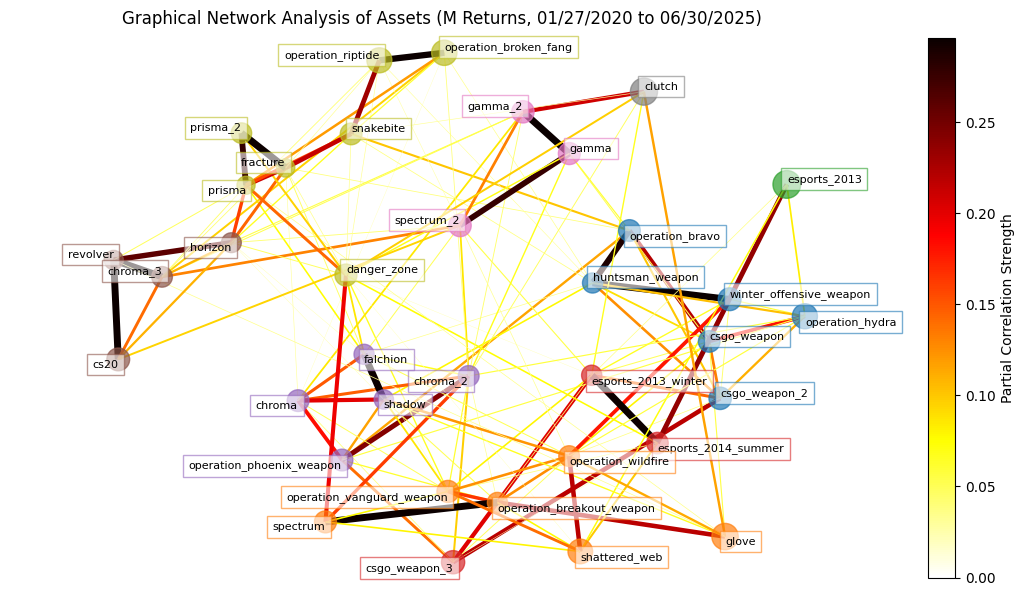

In [176]:
# Example usage
result = graphical_network_analysis(
    rets=assets.returns['2020':],
    freq='M',  # Weekly returns
    min_samples=2  # Require at least 50 non-NaN returns per asset
)

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection


def compute_graphical_network(rets: pd.DataFrame, min_samples: int = 5) -> dict:
    """
    Compute clusters, partial correlations, and 2D embedding for asset returns.

    Args:
        rets (pd.DataFrame): DataFrame with asset returns, columns as assets, index as dates.
        min_samples (int): Minimum number of non-NaN observations required per asset.

    Returns:
        dict: Dictionary containing clustering labels, partial correlations, embedding, etc.
    """
    X = rets.drop(columns=['market'], errors='ignore').copy()

    valid_assets = X.columns[X.notna().sum() >= min_samples]
    if len(valid_assets) < 2:
        raise ValueError("Insufficient valid assets with enough non-NaN returns.")
    X = X[valid_assets].dropna(how='all')

    names = np.array(X.columns)
    print('Number of assets examined:', X.shape[1])

    # Standardize returns
    X_std = X / X.std(axis=0)
    X_std = X_std.fillna(0)

    # Graphical Lasso
    edge_model = covariance.GraphicalLassoCV(max_iter=1000)
    edge_model.fit(X_std)

    # Affinity propagation clustering
    _, labels = cluster.affinity_propagation(edge_model.covariance_)

    # MDS embedding
    embedding = manifold.MDS(n_components=2, random_state=0).fit_transform(X_std.T).T

    # Partial correlations
    prec = edge_model.precision_.copy()
    d = 1 / np.sqrt(np.diag(prec))
    partial_corr = prec * d
    partial_corr = partial_corr * d[:, np.newaxis]

    return {
        'names': names,
        'labels': labels,
        'partial_correlations': partial_corr,
        'embedding': embedding,
        'scaling_d': d,
        'start': X.index[0],
        'end': X.index[-1]
    }


def plot_graphical_network(rets: pd.DataFrame, min_samples: int = 5):
    """
    Plot the graphical network using the results from compute_graphical_network().

    Args:
        rets (pd.DataFrame): DataFrame with asset returns, columns as assets, index as dates.
        min_samples (int): Minimum number of non-NaN observations required per asset.
    """
    results=compute_graphical_network(rets, min_samples)

    names = results['names']
    labels = results['labels']
    partial_correlations = results['partial_correlations']
    embedding = results['embedding']
    d = results['scaling_d']
    start = results['start']
    end = results['end']
    for i in range(max(labels)+ 1):
        print(f'Cluster {i + 1}: {", ".join(names[labels == i])}')
        
    val_max = np.abs(partial_correlations[np.triu_indices_from(partial_correlations, k=1)]).max()
    non_zero = (np.abs(np.triu(partial_correlations, k=1)) > 0.02)

    n_labels = labels.max()
    color_list = sns.color_palette("tab10", n_labels + 1)
    my_colors = [color_list[i] for i in labels]

    fig = plt.figure(figsize=(12, 6), facecolor='w')
    plt.clf()
    ax = plt.axes([0.05, 0.05, 0.9, 0.9])
    plt.axis('off')

    start_idx, end_idx = np.where(non_zero)
    segments = [[embedding[:, start], embedding[:, stop]]
                for start, stop in zip(start_idx, end_idx)]
    values = np.abs(partial_correlations[non_zero])
    lc = LineCollection(
        segments,
        zorder=0,
        cmap=plt.cm.hot_r,
        norm=plt.Normalize(0, 0.7 * val_max)
    )
    lc.set_array(values)
    lc.set_linewidths(np.minimum(15 * values, 5))
    ax.add_collection(lc)
    axcb = fig.colorbar(lc)
    axcb.set_label('Partial Correlation Strength')

    plt.scatter(embedding[0], embedding[1], s=500 * d ** 2, c=my_colors, alpha=0.7)
    for index, (name, label, (x, y)) in enumerate(zip(names, labels, embedding.T)):
        dx = x - embedding[0]
        dx[index] = 1
        dy = y - embedding[1]
        dy[index] = 1
        this_dx = dx[np.argmin(np.abs(dy))]
        this_dy = dy[np.argmin(np.abs(dx))]
        ha = 'left' if this_dx > 0 else 'right'
        va = 'bottom' if this_dy > 0 else 'top'
        xo = 0.002 if this_dx > 0 else -0.002
        yo = 0.002 if this_dy > 0 else -0.002
        plt.text(
            x + xo, y + yo, name, size=8,
            ha=ha, va=va,
            bbox=dict(facecolor='w', edgecolor=color_list[label], alpha=0.6)
        )

    plt.xlim(embedding[0].min() - 0.15 * np.ptp(embedding[0]),
             embedding[0].max() + 0.10 * np.ptp(embedding[0]))
    plt.ylim(embedding[1].min() - 0.03 * np.ptp(embedding[1]),
             embedding[1].max() + 0.03 * np.ptp(embedding[1]))
    title = f'Graphical Network Analysis of Assets (Returns, {start.strftime("%m/%d/%Y")} to {end.strftime("%m/%d/%Y")})'
    plt.title(title, fontsize=12, pad=10)
    plt.show()


Number of assets examined: 36


c:\Users\steph\Desktop\cs_portfolio-main\.venv\Lib\site-packages\numpy\_core\_methods.py:191: RuntimeWarning:

invalid value encountered in subtract



Cluster 1: csgo_weapon, operation_bravo, csgo_weapon_2, winter_offensive_weapon, csgo_weapon_3
Cluster 2: operation_phoenix_weapon, huntsman_weapon, operation_breakout_weapon, esports_2014_summer, esports_2013_winter, operation_vanguard_weapon, chroma, operation_wildfire, glove, spectrum, operation_hydra, shattered_web, operation_broken_fang
Cluster 3: esports_2013
Cluster 4: chroma_2, falchion, shadow, danger_zone, prisma
Cluster 5: gamma, gamma_2, clutch
Cluster 6: revolver, chroma_3, spectrum_2, horizon, cs20
Cluster 7: prisma_2, fracture, snakebite
Cluster 8: operation_riptide


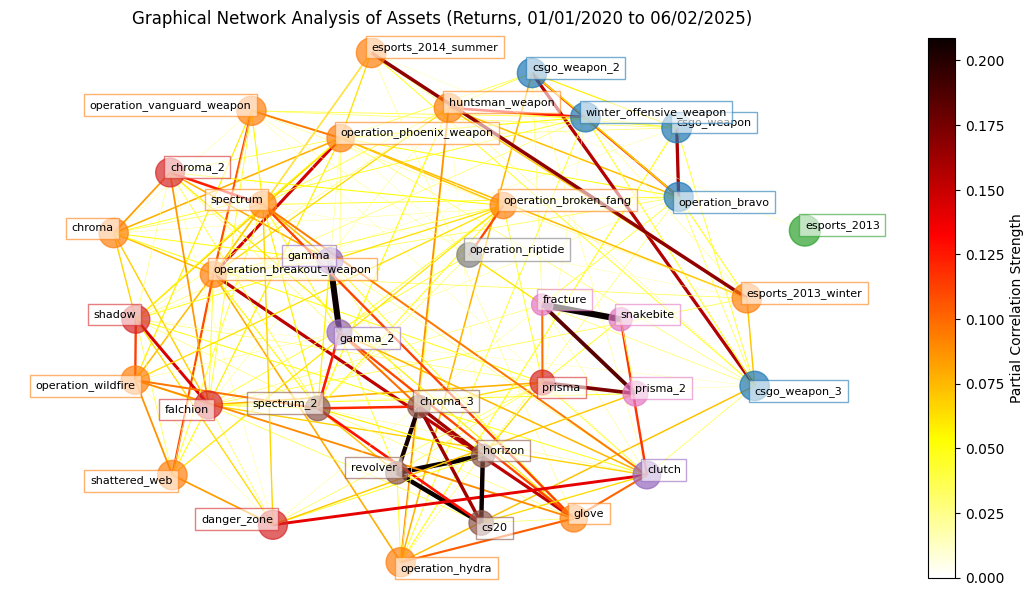

In [233]:
assets.plot_graphical_network_assets('2020')

In [221]:
resu = compute_graphical_network(rets=assets_monthly.returns['2020':])

Number of assets examined: 36


c:\Users\steph\Desktop\cs_portfolio-main\.venv\Lib\site-packages\numpy\_core\_methods.py:191: RuntimeWarning:

invalid value encountered in subtract



In [227]:
labels = resu['labels']
names = resu['names']
for i in range(max(labels)+ 1):
    print(f'Cluster {i + 1}: {", ".join(names[labels == i])}')

Cluster 1: csgo_weapon, operation_bravo, csgo_weapon_2, winter_offensive_weapon, huntsman_weapon, operation_hydra
Cluster 2: operation_breakout_weapon, operation_vanguard_weapon, operation_wildfire, glove, spectrum, shattered_web
Cluster 3: csgo_weapon_3, esports_2014_summer, esports_2013, esports_2013_winter, clutch
Cluster 4: operation_phoenix_weapon, chroma, chroma_2, falchion, shadow
Cluster 5: revolver, chroma_3, horizon, cs20
Cluster 6: gamma, gamma_2, spectrum_2
Cluster 7: danger_zone, prisma, prisma_2, fracture, operation_broken_fang, snakebite, operation_riptide


array([0, 0, 0, 0, 2, 3, 0, 1, 2, 2, 2, 1, 3, 3, 3, 3, 4, 1, 4, 5, 5, 1,
       1, 0, 5, 2, 4, 6, 6, 4, 1, 6, 6, 6, 6, 6])

In [223]:
resu

{'names': array(['csgo_weapon', 'operation_bravo', 'csgo_weapon_2',
        'winter_offensive_weapon', 'csgo_weapon_3',
        'operation_phoenix_weapon', 'huntsman_weapon',
        'operation_breakout_weapon', 'esports_2014_summer', 'esports_2013',
        'esports_2013_winter', 'operation_vanguard_weapon', 'chroma',
        'chroma_2', 'falchion', 'shadow', 'revolver', 'operation_wildfire',
        'chroma_3', 'gamma', 'gamma_2', 'glove', 'spectrum',
        'operation_hydra', 'spectrum_2', 'clutch', 'horizon',
        'danger_zone', 'prisma', 'cs20', 'shattered_web', 'prisma_2',
        'fracture', 'operation_broken_fang', 'snakebite',
        'operation_riptide'], dtype=object),
 'labels': array([0, 0, 0, 0, 2, 3, 0, 1, 2, 2, 2, 1, 3, 3, 3, 3, 4, 1, 4, 5, 5, 1,
        1, 0, 5, 2, 4, 6, 6, 4, 1, 6, 6, 6, 6, 6]),
 'partial_correlations': array([[ 1.        , -0.2226144 , -0.13117887, ..., -0.        ,
         -0.        , -0.        ],
        [-0.2226144 ,  1.        , -0.1012628

Number of assets examined: 36


c:\Users\steph\Desktop\cs_portfolio-main\.venv\Lib\site-packages\numpy\_core\_methods.py:191: RuntimeWarning:

invalid value encountered in subtract



Cluster 1: csgo_weapon, operation_bravo, csgo_weapon_2, winter_offensive_weapon, huntsman_weapon, operation_hydra
Cluster 2: operation_breakout_weapon, operation_vanguard_weapon, operation_wildfire, glove, spectrum, shattered_web
Cluster 3: csgo_weapon_3, esports_2014_summer, esports_2013, esports_2013_winter, clutch
Cluster 4: operation_phoenix_weapon, chroma, chroma_2, falchion, shadow
Cluster 5: revolver, chroma_3, horizon, cs20
Cluster 6: gamma, gamma_2, spectrum_2
Cluster 7: danger_zone, prisma, prisma_2, fracture, operation_broken_fang, snakebite, operation_riptide


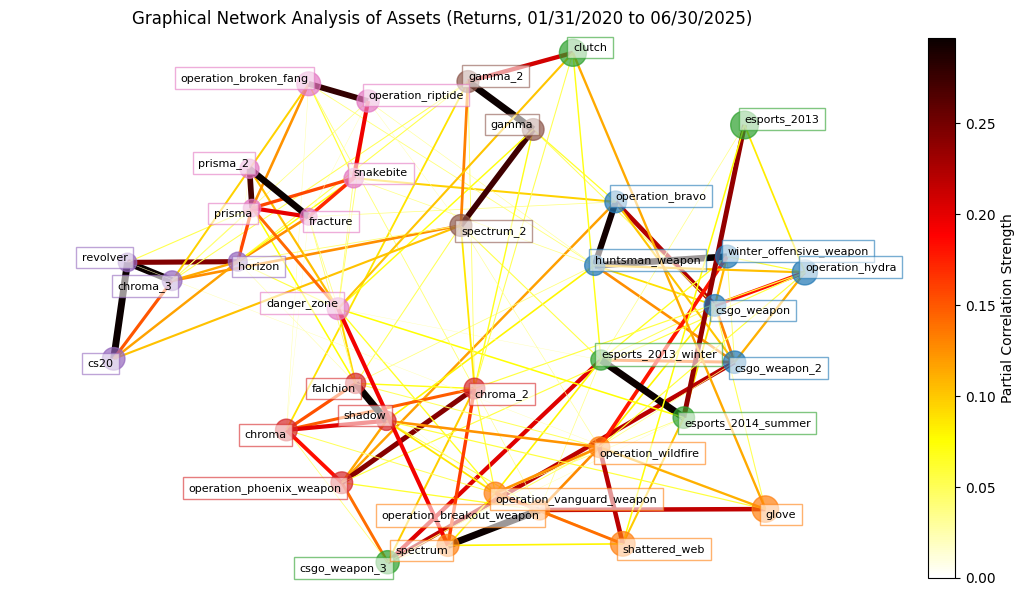

In [232]:
plot_graphical_network(assets_monthly.returns['2020':])

Number of assets examined: 36


c:\Users\steph\Desktop\cs_portfolio-main\.venv\Lib\site-packages\numpy\_core\_methods.py:191: RuntimeWarning:

invalid value encountered in subtract



Cluster 1: csgo_weapon, operation_bravo, csgo_weapon_2, winter_offensive_weapon, huntsman_weapon, operation_hydra
Cluster 2: operation_breakout_weapon, operation_vanguard_weapon, operation_wildfire, glove, spectrum, shattered_web
Cluster 3: csgo_weapon_3, esports_2014_summer, esports_2013, esports_2013_winter, clutch
Cluster 4: operation_phoenix_weapon, chroma, chroma_2, falchion, shadow
Cluster 5: revolver, chroma_3, horizon, cs20
Cluster 6: gamma, gamma_2, spectrum_2
Cluster 7: danger_zone, prisma, prisma_2, fracture, operation_broken_fang, snakebite, operation_riptide


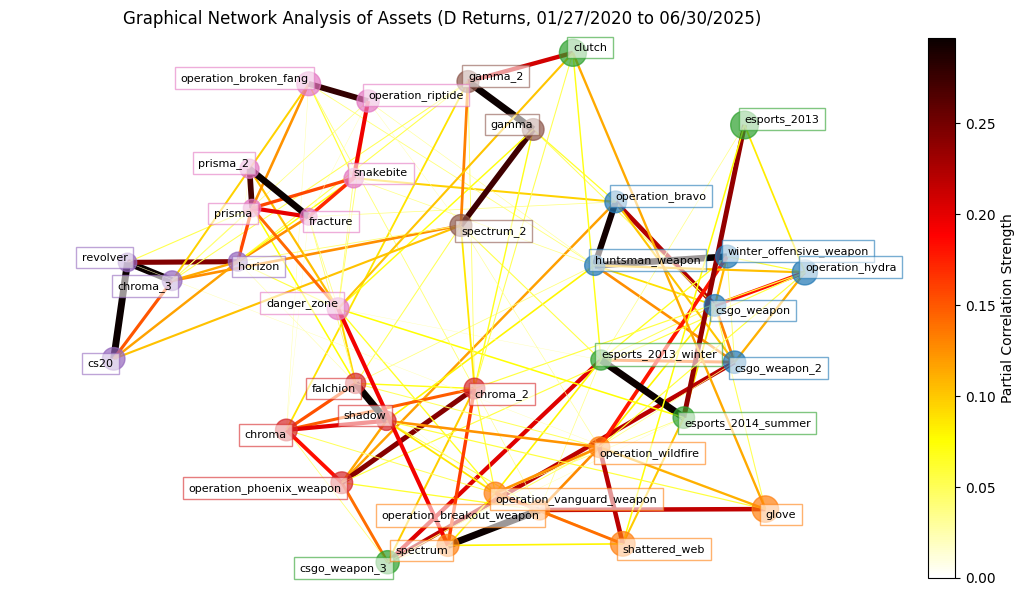

In [177]:
# Example usage
result2 = graphical_network_analysis(
    rets=assets_monthly.returns['2020':],
    freq='D',  # Weekly returns
    min_samples=2  # Require at least 50 non-NaN returns per asset
)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from typing import List

def select_representative_assets(distance_matrix: pd.DataFrame, n_clusters: int=3, n_assets_per_cluster: int=1) -> List[str]:
    """
    Perform KMeans clustering and select the n assets closest to the cluster center in each cluster.

    Args:
        distance_matrix (pd.DataFrame): A square DataFrame (N x N) representing distances or features for each asset.
                                        Rows/columns should be labeled with asset names.
        n_clusters (int): Number of clusters to form.
        n_assets_per_cluster (int): Number of closest assets to select from each cluster.

    Returns:
        List[str]: List of selected asset names (length = n_clusters * n_assets_per_cluster).
    """
    asset_names = distance_matrix.index
    X = distance_matrix.values

    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
    clusters = kmeans.fit_predict(X)
    centers = kmeans.cluster_centers_

    selected_assets = []

    for cluster_id in range(n_clusters):
        # Get indices of assets in this cluster
        cluster_indices = np.where(clusters == cluster_id)[0]
        cluster_points = X[cluster_indices]
        cluster_center = centers[cluster_id]

        # Compute distances to cluster center
        distances = np.linalg.norm(cluster_points - cluster_center, axis=1)
        closest_indices = cluster_indices[np.argsort(distances)[:n_assets_per_cluster]]
        selected_assets.extend(asset_names[closest_indices])

    return selected_assets


In [200]:
select_representative_assets(assets.distance_matrix,3,2)

['operation_bravo',
 'csgo_weapon_2',
 'chroma_3',
 'spectrum_2',
 'prisma',
 'falchion']

In [186]:
get_equal_weight_pf(assets.returns[['operation_bravo', 'chroma_3', 'prisma']])

operation_bravo    0.333333
chroma_3           0.333333
prisma             0.333333
dtype: float64

In [ ]:
plot_backtest_vs_eq(assets.returns[['operation_bravo', 'chroma_3', 'prisma']],assets.marketret,weight_func=get_equal_weight_pf,rebalancing='YE')

In [197]:
assets.returns.loc['2022':,['chroma_3']]

chroma_3
date                
2022-01-01  0.108280
2022-01-02  0.011494
2022-01-03  0.017045
2022-01-04  0.005587
2022-01-05 -0.005556
...              ...
2025-05-29  0.004170
2025-05-30  0.013825
2025-05-31  0.027028
2025-06-01 -0.004175
2025-06-02 -0.007167

[1249 rows x 1 columns]

c:\Users\steph\Desktop\cs_portfolio-main\cs_portfolio_project\optimisation\portfolio.py:455: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

c:\Users\steph\Desktop\cs_portfolio-main\cs_portfolio_project\optimisation\portfolio.py:508: FutureWarning:

The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.



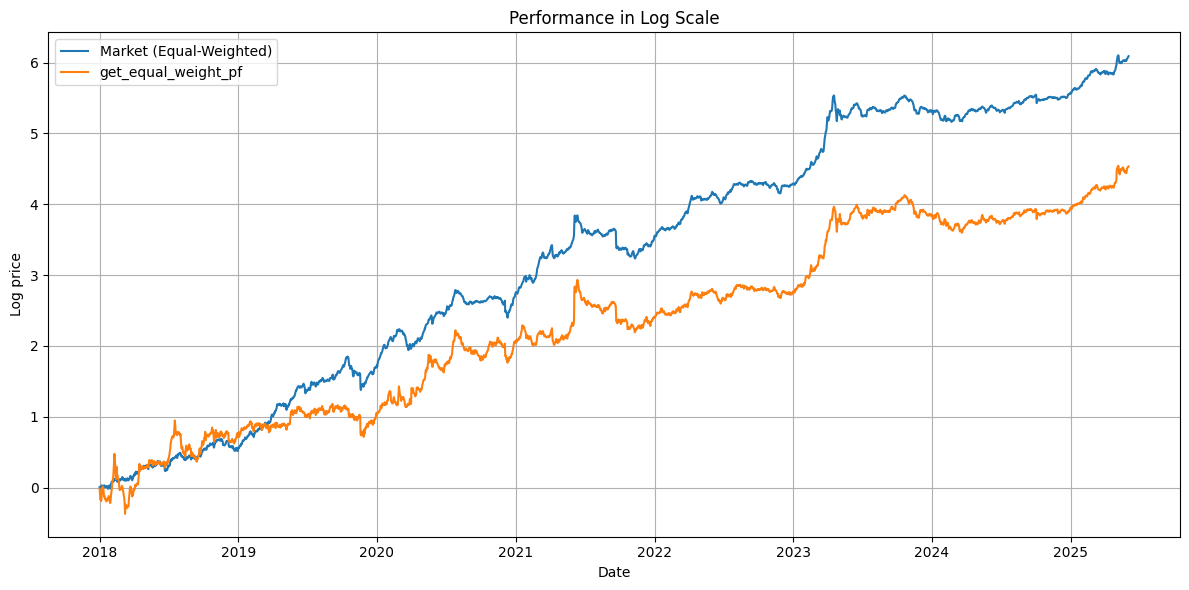

In [208]:
plot_backtest_vs_eq(assets.returns.loc['2018':,[
 'operation_hydra','shattered_web',

 'cs20']],assets.marketret['2018':],weight_func=get_equal_weight_pf,rebalancing='M')

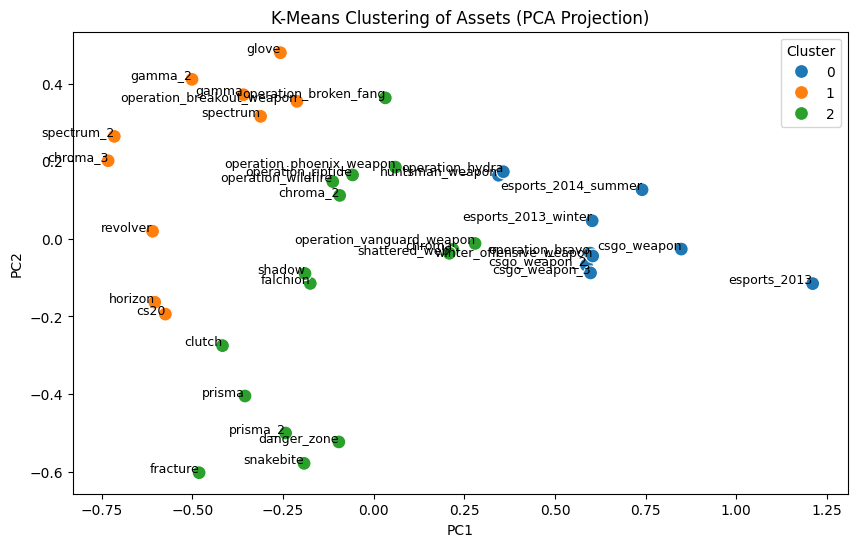

In [180]:
assets.Kmeans_PCA_plot(3)

In [150]:

def plot_elbow_method(distance_matrix, max_k=10):
    inertias = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
        kmeans.fit(distance_matrix)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=(8, 4))
    plt.plot(range(1, max_k + 1), inertias, 'bo-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method For Optimal k')
    plt.grid(True)
    plt.show()

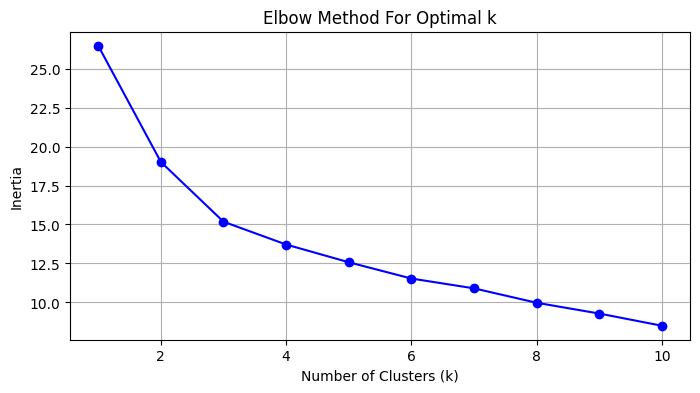

In [155]:
plot_elbow_method(assets_weekly.distance_matrix)

In [156]:
from sklearn.metrics import silhouette_score

def find_best_k_silhouette(distance_matrix, min_k=2, max_k=10):
    best_k = min_k
    best_score = -1
    for k in range(min_k, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
        labels = kmeans.fit_predict(distance_matrix)
        score = silhouette_score(distance_matrix, labels)
        print(f"k={k}, silhouette score={score:.4f}")
        if score > best_score:
            best_score = score
            best_k = k
    return best_k

In [159]:
find_best_k_silhouette(assets_weekly.distance_matrix)

k=2, silhouette score=0.2641
k=3, silhouette score=0.2093
k=4, silhouette score=0.2017
k=5, silhouette score=0.1944
k=6, silhouette score=0.1938
k=7, silhouette score=0.1427
k=8, silhouette score=0.1482
k=9, silhouette score=0.1219
k=10, silhouette score=0.1269


2

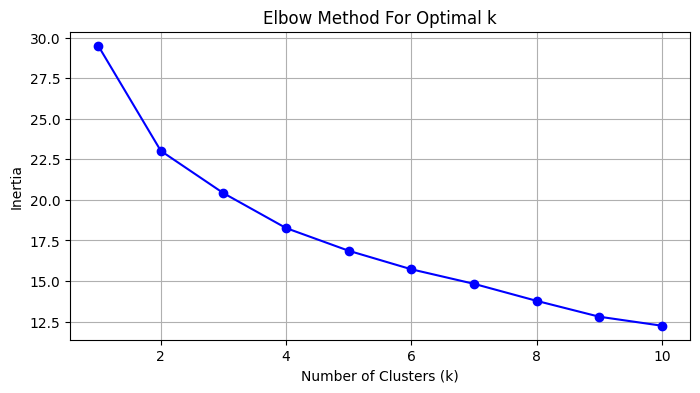

In [151]:
plot_elbow_method(assets.distance_matrix)

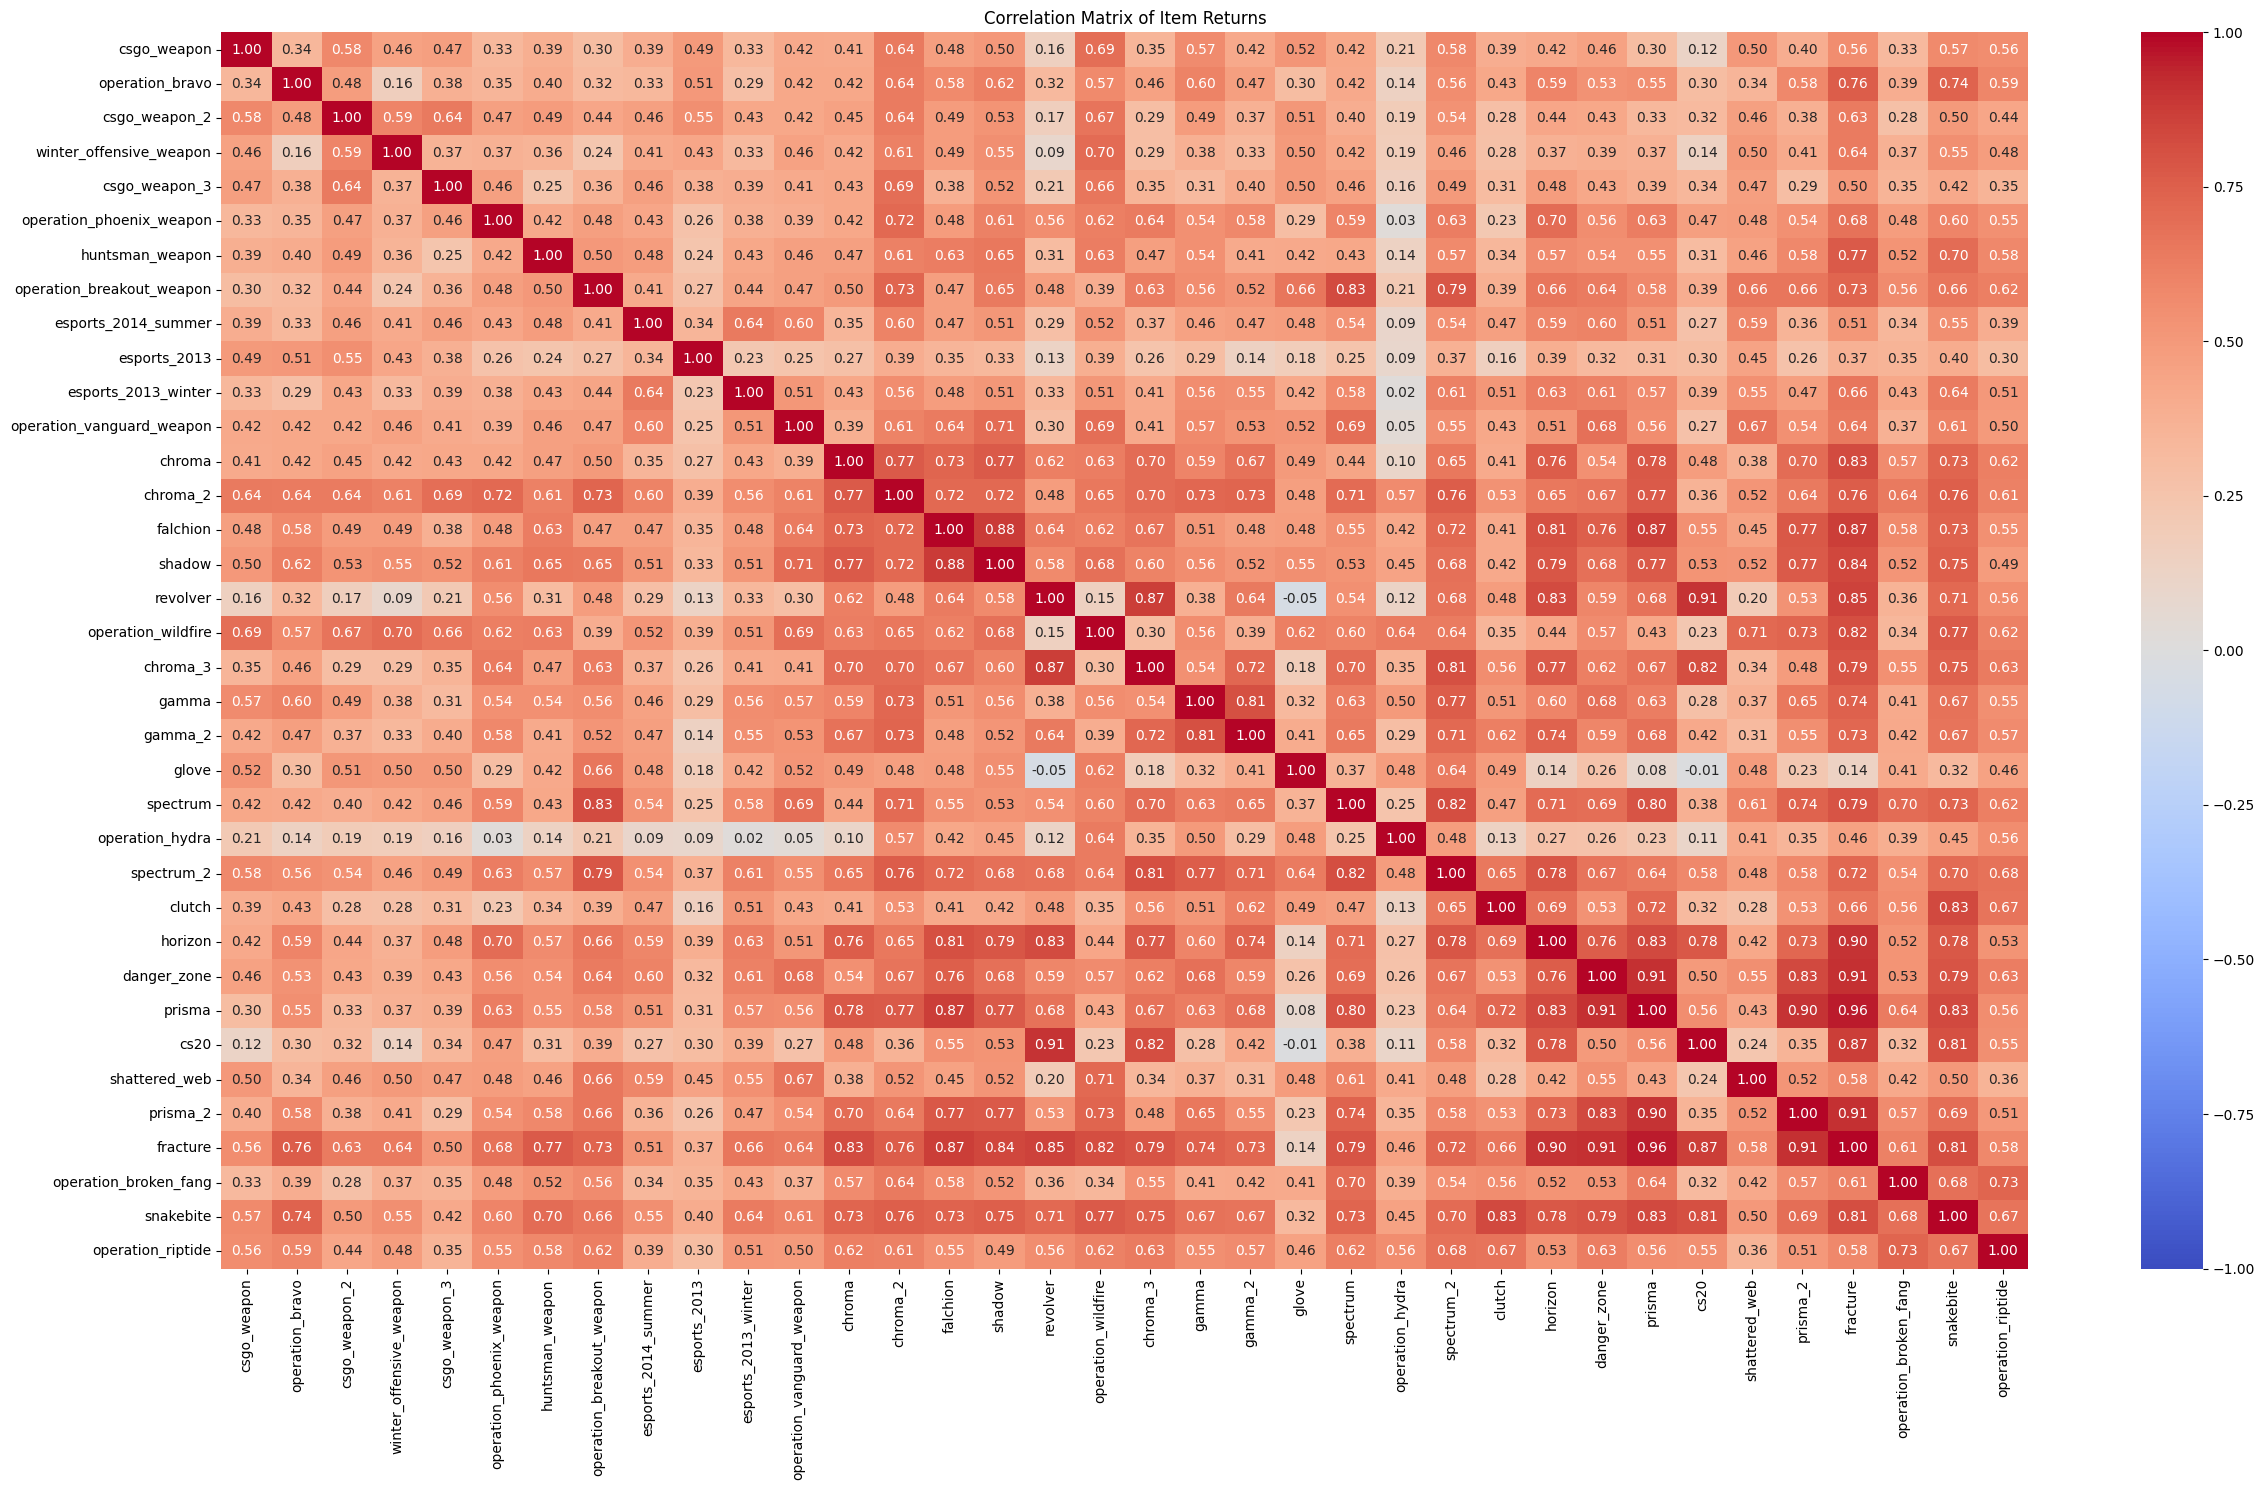

In [209]:
assets_monthly.plot_corr_matrix()